In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Load data
df = pd.read_csv('data/individual_calibration_set.csv')

Bx, By, Bz = df['B_x'].to_numpy(), df['B_y'].to_numpy(), df['B_z'].to_numpy() # Extract fields
V1, V2, V3 = df['V_1'].to_numpy(), df['V_2'].to_numpy(), df['V_3'].to_numpy()  # Extract voltages

## Calibration

### Function to find slope values and plot graphs

In [3]:
def find_slopes(x:np.array, y1:np.array, y2:np.array, y3:np.array):
    """plots y1, y2, and y3 vs x and returns the corresponding slopes"""
    index = x != 0 # Indexes for which v is non-zero
    x, y1, y2, y3 = x[index], y1[index], y2[index], y3[index] # Values for which v is non-zero
    # Apply regression. Data need to be reshaped
    reg1 = LinearRegression().fit(x.reshape(-1, 1), y1.reshape(-1, 1))
    reg2 = LinearRegression().fit(x.reshape(-1, 1), y2.reshape(-1, 1))
    reg3 = LinearRegression().fit(x.reshape(-1, 1), y3.reshape(-1, 1))

    # Plot
    fig, ax = plt.subplots()
    ax.plot(x, y1, label=r'$B_x$', linewidth=4.0)
    ax.plot(x, reg1.predict(x.reshape(-1, 1), ), label=r'$B_x$ Fit', linewidth=4.0, color='black', ls='--')

    ax.plot(x, y2, label=r'$B_y$', linewidth=4.0)
    ax.plot(x, reg2.predict(x.reshape(-1, 1), ), label=r'$B_y$ Fit', linewidth=4.0, color='black', ls='--')

    ax.plot(x, y3, label=r'$B_z$', linewidth=4.0)
    ax.plot(x, reg3.predict(x.reshape(-1, 1), ), label=r'$B_z$ Fit', linewidth=4.0, color='black', ls='--')
    ax.set_xlabel(r'$V_1$ (arb. u.)')
    ax.set_ylabel('Field (arb. u.)' )
    #ax.set_xlim(0,1)
    ax.legend(loc=0)
    ax.grid()

    # Slope values
    k1, k2, k3 = float(reg1.coef_), float(reg2.coef_), float(reg3.coef_)
    return k1, k2, k3

### Field vs $V_1$

k1x, k1y, k1z = 
5.303300858899103, 0.0, 1.7677669529663669


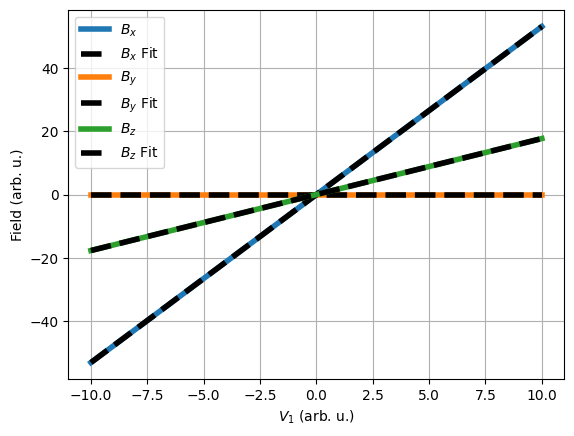

In [4]:
k1x, k1y, k1z = find_slopes(V1, Bx, By, Bz)
print(r'k1x, k1y, k1z = ')
print(k1x, k1y, k1z, sep=', ')

### Field vs $V_2$

k2x, k2y, k2z = 
-2.651650429449552, 4.592793267718457, 1.7677669529663669


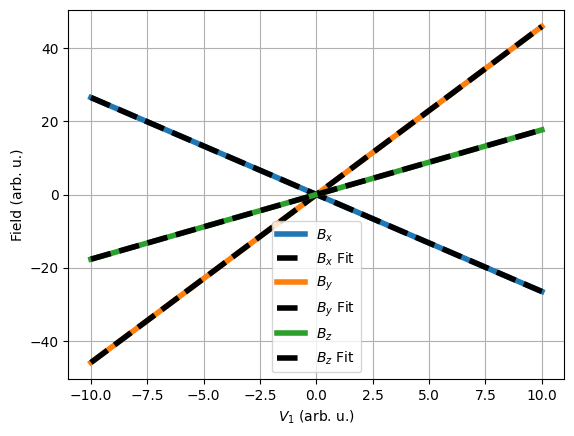

In [5]:
k2x, k2y, k2z = find_slopes(V2, Bx, By, Bz)
print(r'k2x, k2y, k2z = ')
print(k2x, k2y, k2z, sep=', ')

Field vs $V_3$

k3x, k3y, k3z = 
-2.651650429449552, -4.592793267718457, 1.7677669529663669


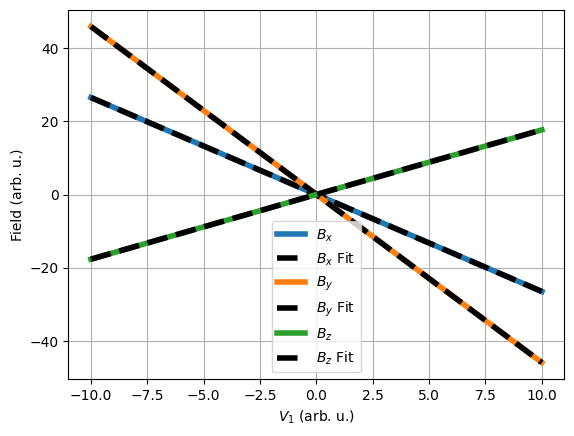

In [6]:
k3x, k3y, k3z = find_slopes(V3, Bx, By, Bz)
print(r'k3x, k3y, k3z = ')
print(k3x, k3y, k3z, sep=', ')

### Calibration matrix

In [7]:
# Slope matrix
M = np.array([[k1x, k1y, k1z],
              [k2x, k2y, k2z],
             [k3x, k3y, k3z]])
# Calibration
M_ = np.linalg.inv(M)
print('calibration matrix\n', M_)

calibration matrix
 [[ 1.25707872e-01 -6.28539361e-02 -6.28539361e-02]
 [ 2.45218238e-18  1.08866211e-01 -1.08866211e-01]
 [ 1.88561808e-01  1.88561808e-01  1.88561808e-01]]


In [8]:
# Check
np.dot(M,M_)

array([[ 1.00000000e+00, -5.92418065e-18, -5.92418065e-18],
       [-1.23699426e-17,  1.00000000e+00, -5.92418065e-18],
       [-1.23699426e-17, -5.92418065e-18,  1.00000000e+00]])

In [9]:
# Save the calibration matrix as csv
np.savetxt("data/lin_cal_mat.csv", M_)